In [5]:
"""色々準備"""
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.tools import array_to_latex

# 1. 複数量子ビット状態の表現

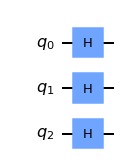

In [3]:
"""n量子ビットの複素確率振幅は、2^n個になる。
なので、10量子ビット程度はまあ計算できるが、スパコンでも100量子ビットは不可能
"""
# 3量子ビットの回路作成
qc = QuantumCircuit(3)

# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)

# See the circuit:
qc.draw()

In [4]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

# 2. 複数量子ビット状態ベクトル上の単一量子ビットゲート

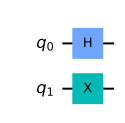

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

In [3]:
"""手で計算する代わりにQiskitのunitary_simulatorを使用すると計算をしてくれます。
unitary simulatorは、回路にある全てのゲートを乗算して量子回路全体を表現する一つのユニタリー行列にしてくれます。
"""
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()

In [6]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

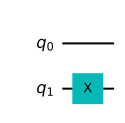

In [7]:
"""1量子ビットのみにゲートを適用する場合（以下の回路など）、単位行列を使用してテンソル積を実行します。
例：X⊗I
"""
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

In [9]:
# Simulate the unitary
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
# Display the results:
array_to_latex(unitary, pretext="\\text{Circuit = } ")

<IPython.core.display.Math object>

# 2.1 練習問題:

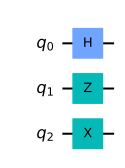

In [10]:
"""(1)
次の一連のゲートにより作成される単一量子ビットユニタリー ( U ) を計算せよ。 
U=XZH
結果の確認にはQisikitのunitary simulatorを使用すること。
"""
qc = QuantumCircuit(3)
qc.h(0)
qc.z(1)
qc.x(2)
qc.draw()

In [12]:
backend = Aer.get_backend("unitary_simulator")
unitary = execute(qc, backend).result().get_unitary()

array_to_latex(unitary, pretext="\\text{circuit = }")

<IPython.core.display.Math object>

# 3. 複数量子ビットゲート

# 3.1 CNOTゲート 

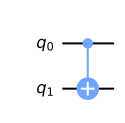

In [13]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw()

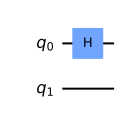

In [14]:
""" 量子ビットのCNOTゲート
今度は重ね合わせ状態の量子ビットに対しての作用を見ていきましょう。1量子ビットを |+⟩ の状態にします。
"""
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw()

In [15]:
"""
これは期待通りに 
|0⟩⊗|+⟩ = |0+⟩
の状態を作ります。
"""
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

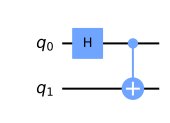

In [16]:
"""CNOTゲートを適用するとどうなるか見てみましょう。"""
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

In [17]:
"""
CNOT|0+⟩=1/√2(|00⟩+|11⟩)
になる。
これはもつれ状態になっており、大変興味深いです。もつれ状態については次節に進みましょう。
"""
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

# 3.2 もつれ状態

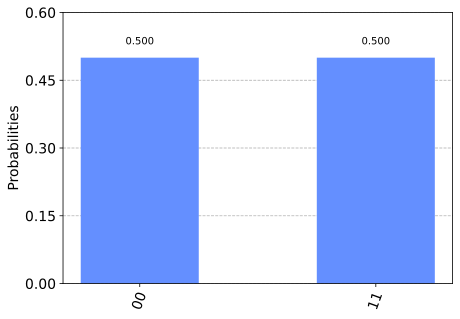

In [18]:
"""ベル状態
前節では以下の状態を作ることができることを見ました。:
1/√2(|00⟩+|11⟩)
 
これはベル状態として知られています。この状態は、50%の確率で |00⟩ の状態が観測され、50%の確率で |11⟩
 の状態が観測されます。最も興味深いことに、 |01⟩ または |10⟩
 が観測される確率は0% です。このことは、Qiskitで確認することができます。
"""
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

# 3.3 練習問題:

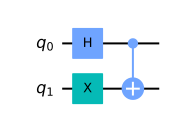

In [19]:
"""(1)
以下のベル状態を作り出す量子回路を作成せよ。  
1/√2(|01⟩+|10⟩)
 状態ベクトルシミュレーターを使用して結果を検証せよ。

1/√2(|01⟩+|10⟩)
= CNOT 1/√2(|11> + |10>)
= CNOT 1/√2|1>(|1>+|0>)
= CNOT |1>|+>
= CNOT |1+>
"""
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.cx(0, 1)

qc.draw()

In [20]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

In [21]:
"""(2)
設問1にて作成した回路は状態 |00⟩ を1/√2(|01⟩+|10⟩)
 に変換するものである。この回路のユニタリー行列をQiskitシミュレータを使用して計算せよ。このユニタリー行列が正しい変換を行えることを検証せよ。
"""
backend = Aer.get_backend("unitary_simulator")
unitary = execute(qc, backend).result().get_unitary()

array_to_latex(unitary, pretext="\\text{circuit = }")

<IPython.core.display.Math object>

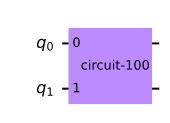

In [33]:
#  (1)で作ったqcを、新しく作ったqc2にappendして、シミュレータで動作を確認する。
qc2 = QuantumCircuit(2)

qc2.append(qc, [0, 1])

qc2.draw()

In [34]:
# Let's see the result:
backend2 = Aer.get_backend('statevector_simulator')
final_state2 = execute(qc2,backend2).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state2, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>